In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/gasak/OneDrive/바탕 화면/big data/파이썬 머신러닝/pandas/titanic/train.csv')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

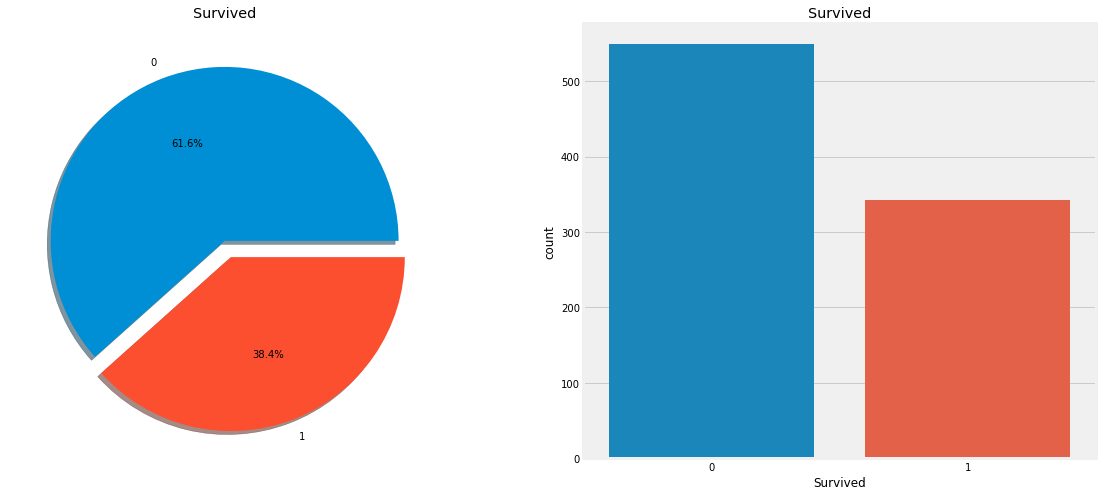

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# explode : 파이 조각이 돌출되는 크기(0이면 돌출x) - 2번째 파이조각을 돌출
# autopct : 파이 조각의 전체 대비 백분율 - 소수점 1자리까지 %로 표기
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
# Features tpye
# 1. Categorical : Sex, Embarked - cnanot sort or give any ordering
# 2. Ordinary : PClass - can sort and give ordering
# 3. Cntinous : Age - Literally continuous variable

In [7]:
# 1. Sex Analysis
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

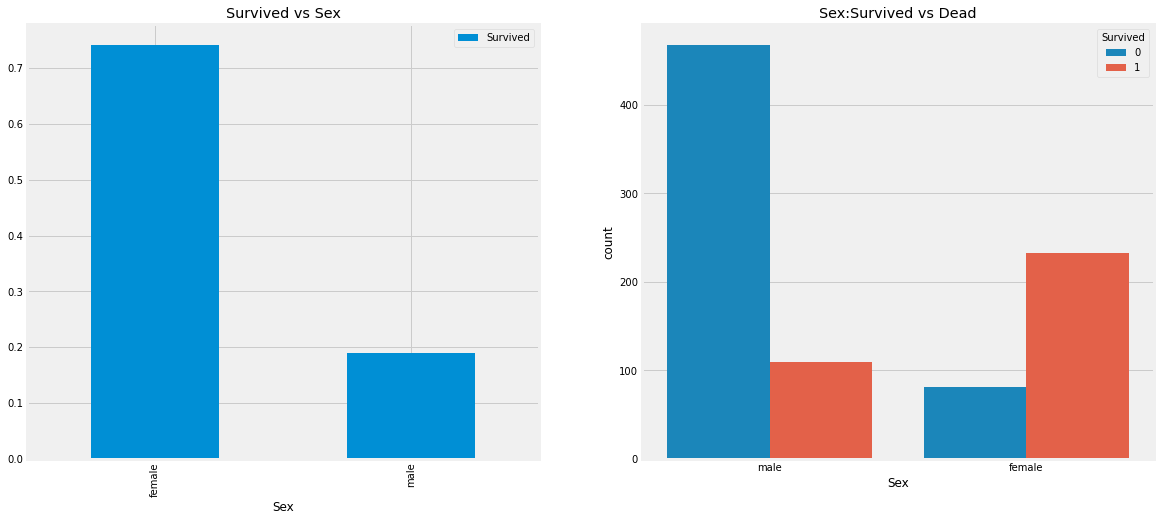

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df, ax=ax[1])
# hue인자에 카테고리컬 변수를 지정하면 카테고리값에 따라 색을 변화
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [9]:
df.groupby(['Sex', 'Survived'], as_index=False)['PassengerId'].count()

,Sex,Survived,PassengerId
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [10]:
# Pclass Analysis
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')
# background_gradient로 heatmpas를 만들 수 있다.(matplotlib 모듈), 값의 크기에 따라 gradient 변화
# margins 파라미터로 행, 열 합 추가 가능

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [11]:
pd.crosstab(df.Pclass,df.Survived,margins=False).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


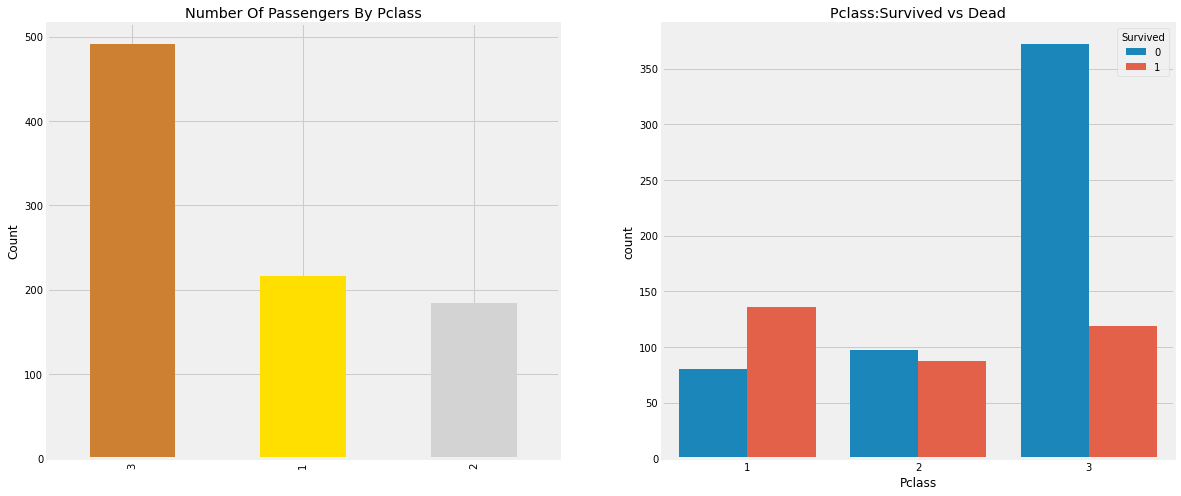

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [13]:
df[['Pclass', 'Survived']].groupby('Pclass').mean()
# Pclass 3의 생존율이 가장 낮다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
# Sex와 Pclass를 같이
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

In [15]:
pd.crosstab([df.Sex, df.Pclass], df.Survived, margins=True).style.background_gradient(cmap='summer_r')
# Pclass별 성별에 따른 생존자, 사망자 확인은 위에가 낫다.

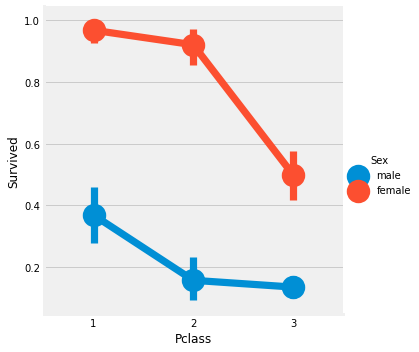

In [16]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)
# y의 평균값 그래프
# Categorical value로 구분되어있기 때문에 factorplot가 용이
# Pclass와는 무관하게 여성이 우선시 구조, PClass1의 남자는 생존율 낮다.

In [17]:
df[['Sex','Pclass','Survived']].groupby(['Sex', 'Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [18]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [19]:
# Age Analysis
print('Oldereest Passenger was of : ', df['Age'].max(), 'Years')
print('Younged Passenger was of : ', df['Age'].min(), 'Years')
print('Average Passenger was of : ', df['Age'].mean(), 'Years')

Oldereest Passenger was of :  80.0 Years
Younged Passenger was of :  0.42 Years
Average Passenger was of :  29.69911764705882 Years


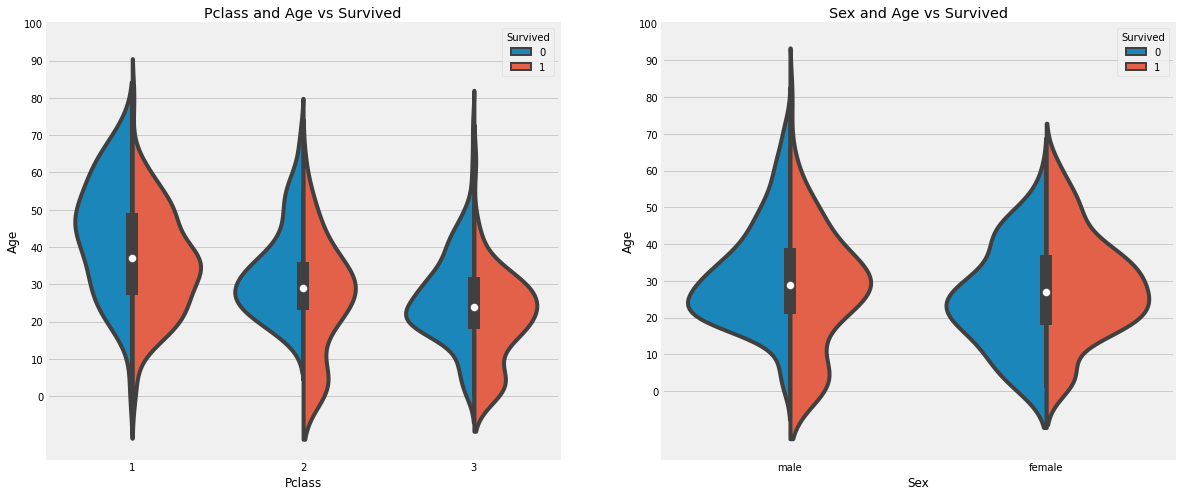

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [21]:
# violinplot으로 boxplot처럼 분포도를 알 수 있다.

In [22]:
# 이름중에 Mr, Mrs들어가는 사람의 나이중 결측값에 평균을 대입
df['Initial'] = 0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')
    #위 extraxt의 의미는 A-Z와 a-z의 문자중 다음 문자로 .이 따라오는 것을 추출

In [23]:
pd.crosstab(df.Initial, df.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [24]:
df['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [25]:
# Mlle 또는 Mme와 같이 Miss를 나타내는 잘못된 이니셜이 있다.
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [26]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [27]:
df.loc[(df.Age.isnull()) & (df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'),'Age']=46

In [28]:
df.Age.isnull().any() # NuLL값이 있는지 확인

False

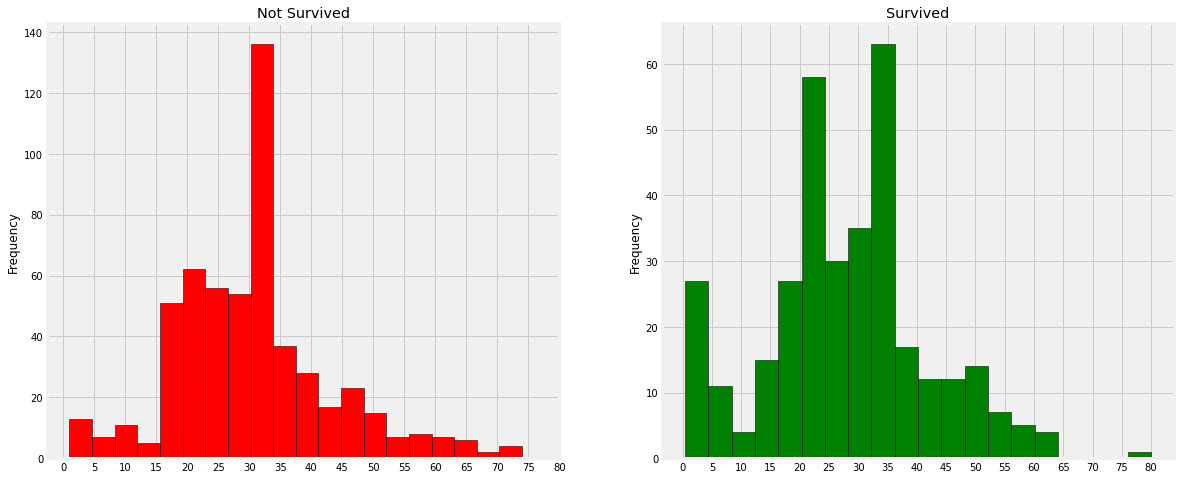

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
df[df.Survived == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Not Survived')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
df[df.Survived==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('Survived')
ax[1].set_xticks(range(0, 85, 5))
plt.show()

In [30]:
# 30 ~ 40대의 사람의 사망율이 높다.
# 아이들의 생존도 우선시
# 80대의 노인은 살았다.

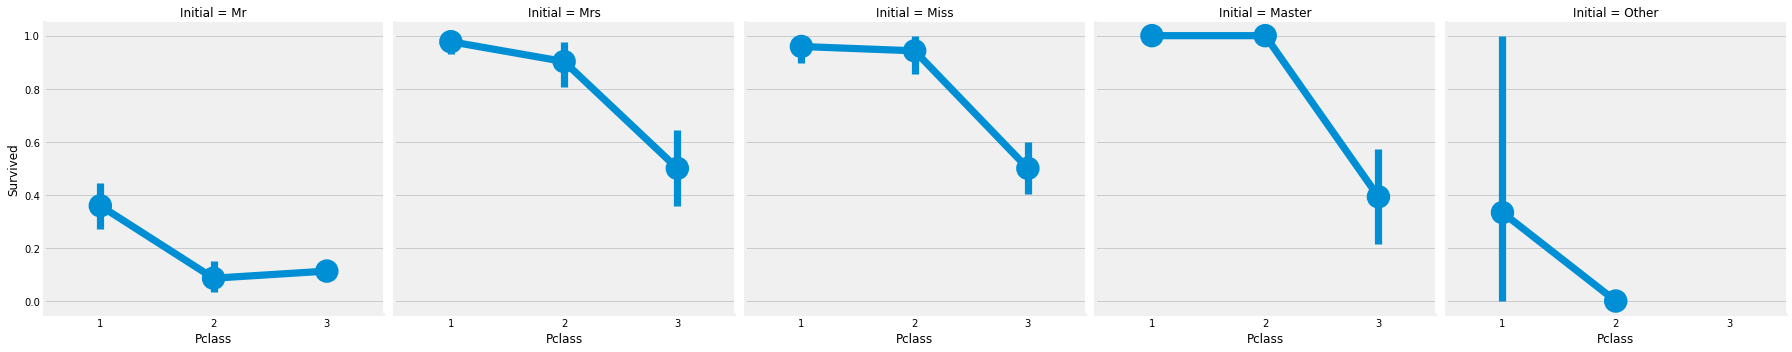

In [31]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=df)

In [32]:
# Embarked Analysis (Embarked : 승선함 항구명)
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

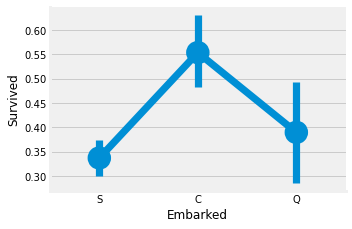

In [33]:
sns.factorplot('Embarked', 'Survived', data=df)
fig=plt.gcf()
fig.set_size_inches(5, 3)
plt.show()
# figure에 접근해야할 땐, plt.gcf()

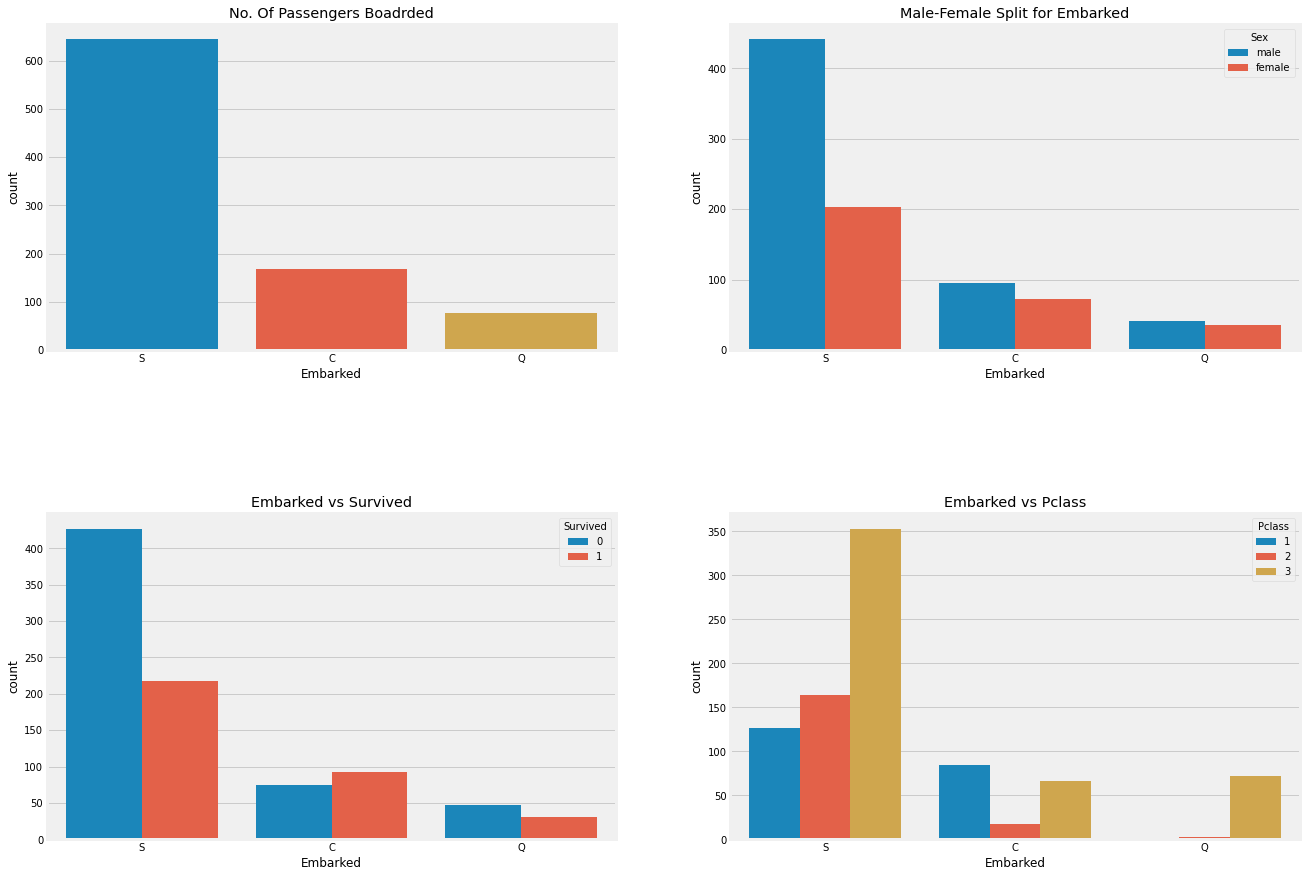

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df, ax=ax[0,0])
ax[0, 0].set_title('No. Of Passengers Boadrded')
sns.countplot('Embarked', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [35]:
df.groupby(['Embarked', 'Pclass'])['Survived'].mean()
# Embarked 's'의 생존율이 낮은 이유는 Pclass3 의 대략 81% 사람이 사망했기 때문

Embarked  Pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64

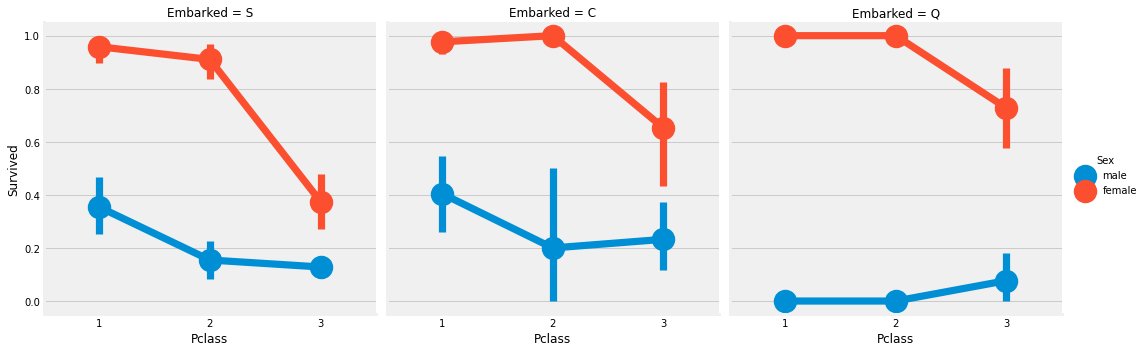

In [36]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=df)
plt.show()

In [37]:
# NULL value of Embakred
# Maximum passenger boarded from pors S, so replace Null with 'S'
df['Embarked'].fillna('S', inplace=True)

In [38]:
df.Embarked.isna().any()

False

In [39]:
# SibSp Analysis
pd.crosstab(df.SibSp, df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


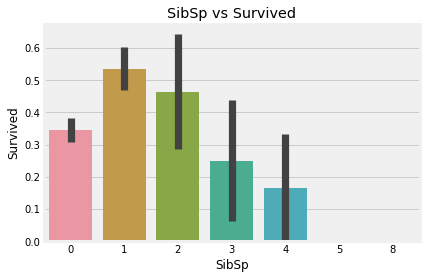

In [40]:
sns.barplot('SibSp', 'Survived', data=df).set_title('SibSp vs Survived')
plt.show()
# barplot에서 가는선은 추정치이다. 이는 신뢰구간과 유사
# 이 범위는 기본적으로 부트 스트랩 신뢰구간이라는 것을 사용한다.
# 이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것이라는 의미
# 신뢰구간이 아니라 표준편차를 표현하고 싶으면 파라미터로 ci="sd" 저장

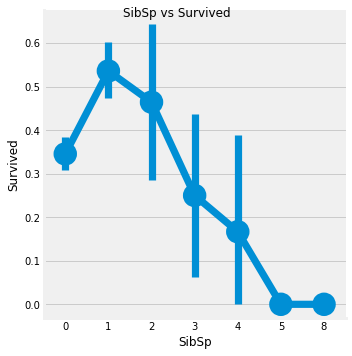

In [41]:
factor = sns.factorplot('SibSp', 'Survived', data=df, ax=ax[1])
factor.fig.suptitle('SibSp vs Survived')
plt.show()

In [42]:
pd.crosstab(df.SibSp, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [43]:
# Parch Analysis
pd.crosstab(df.Parch, df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [44]:
pd.crosstab(df.Parch, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


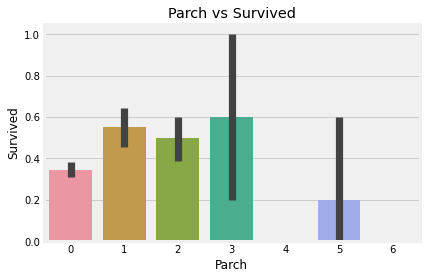

In [45]:
sns.barplot('Parch', 'Survived', data=df).set_title('Parch vs Survived')
plt.show()

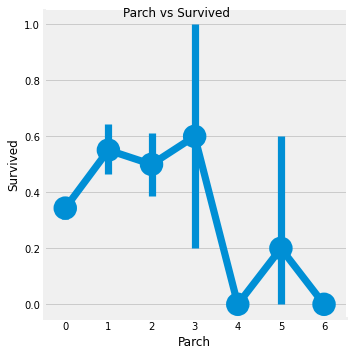

In [46]:
fac = sns.factorplot('Parch', 'Survived', data=df)
fac.fig.suptitle('Parch vs Survived')
plt.show()

In [47]:
# Fare(continous) Analysis
print('Highest Fare was : ', df['Fare'].max())
print('Lowest Fare was : ', df['Fare'].min())
print('Average Fare was : ', df['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.2042079685746


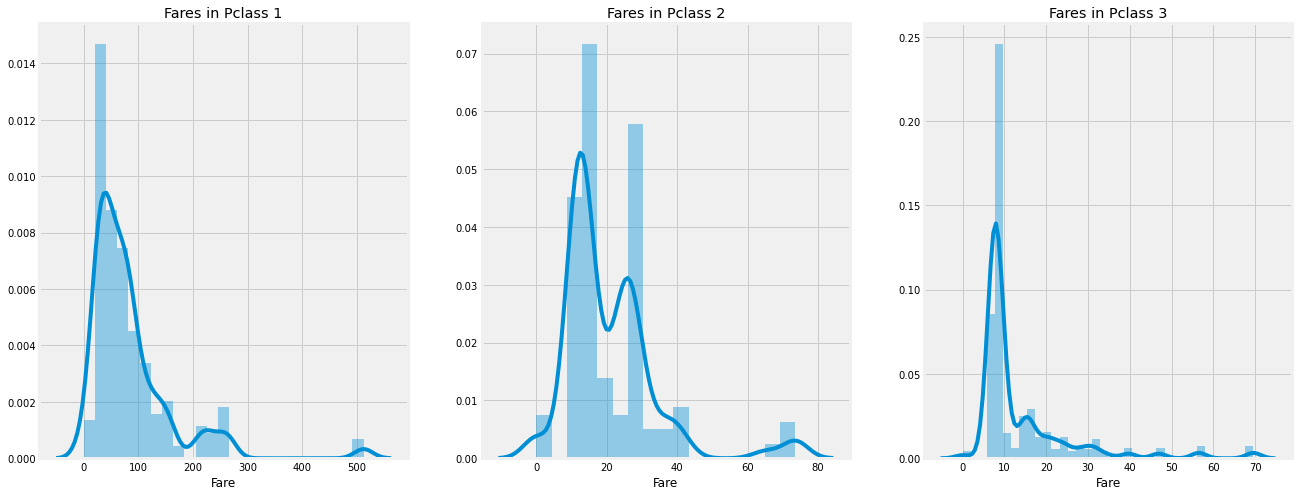

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(df[df['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [49]:
# 정리
# Sex : 남성보다 여성의 생존율이 높다. 이는 구조가 여성이 우선한다.
# Pclass : Pclass 1의 승객의 생존율이 높다. 반면에 3은 낮다. 여성에게는 Pclass 1이 거의 1등이고, 2등도 높다.
# Age : 5~10살의 아이들의 생존율이 높고 15~35살의 성인들이 많이 사망
# Embarked : Q의 사람들은 대다수가 Pclass 3. Embarked중에서 C만 생존율이 사망률보다 높다.
# Parch + SibSp : 1~2 SibSP, Spouse on board or 1~3 Parents의 생존율이 높다.
# 혼자오거나 대가족은 상대적으로 낮다.

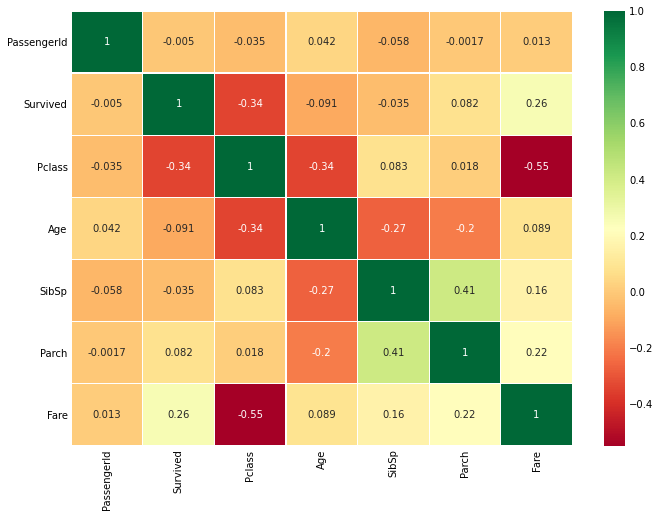

In [50]:
# Correlation
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# annot=True : 각 셀에 숫자를 입력
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()
# 알파벳이나 문자열 사이에 상관관계는 없기 때문에 수치형 벼수에만 적용
# 만약 상관계수가 높다면 다중공산성 문제 발생
# 이는 ML 모델을 학습시킬 때 성능 약화

In [51]:
# 데이터 정제
# Age는 연속형 변수 -> ML모델에 문제가 발생할 가능성 있다.
# 연속형 변수를 범주형 변수로 변환하자(Binning or 표준화)
# 나이(0 ~ 80)을 5단위로 binning하자

In [52]:
df['Age_band'] = 0
df.loc[df['Age'] <= 16, 'Age_band'] = 0
df.loc[(df['Age'] > 16) & (df.Age <= 32), 'Age_band'] = 1
df.loc[(df.Age > 32) & (df.Age <= 48), 'Age_band'] = 2
df.loc[(df.Age > 48) & (df.Age <= 64), 'Age_band'] = 3
df.loc[df.Age > 64, 'Age_band'] = 4

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [54]:
df.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


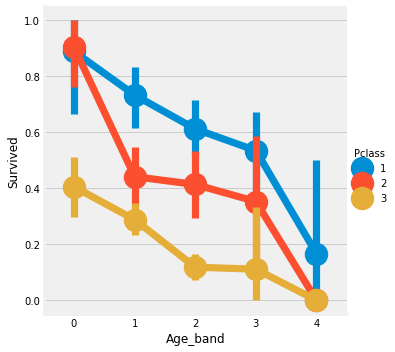

In [55]:
sns.factorplot('Age_band', 'Survived', hue='Pclass', data=df)

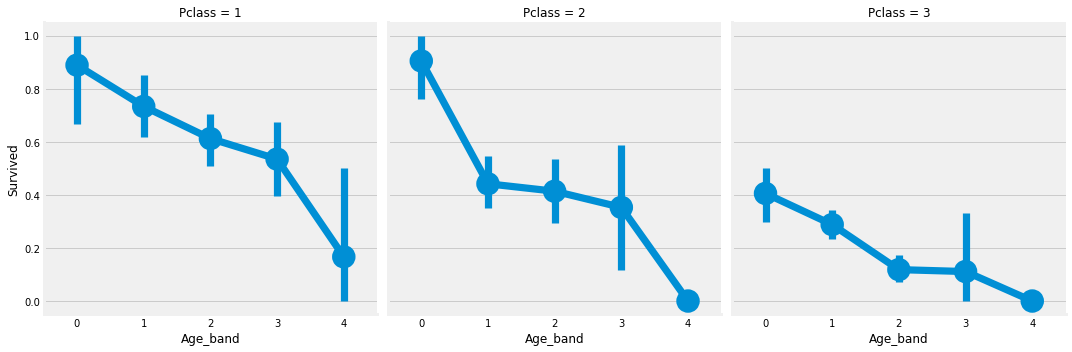

In [56]:
sns.factorplot('Age_band', 'Survived', col='Pclass', data=df)

In [57]:
# PClass와 무관하게 나이가 많을수록 생존율 감소함을 알 수 있다.

In [58]:
# Family_Size and Alone
df['Family_Size'] = 0
df['Family_Size']=df['Parch']+df['SibSp']
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1

Text(0.5, 0.98, 'Alone vs Survived')

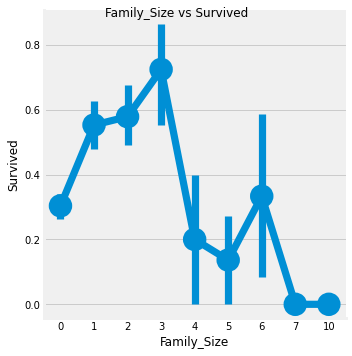

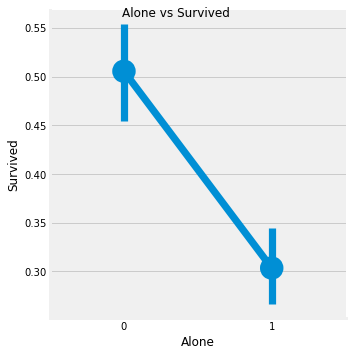

In [59]:
f1 = sns.factorplot('Family_Size', 'Survived', data=df)
f1.fig.suptitle('Family_Size vs Survived')
f2 = sns.factorplot('Alone', 'Survived', data=df)
f2.fig.suptitle('Alone vs Survived')

In [60]:
    # 위 그래프를 보면 혼자이거나 가족이 4명 이상인 경우 생존율 급락

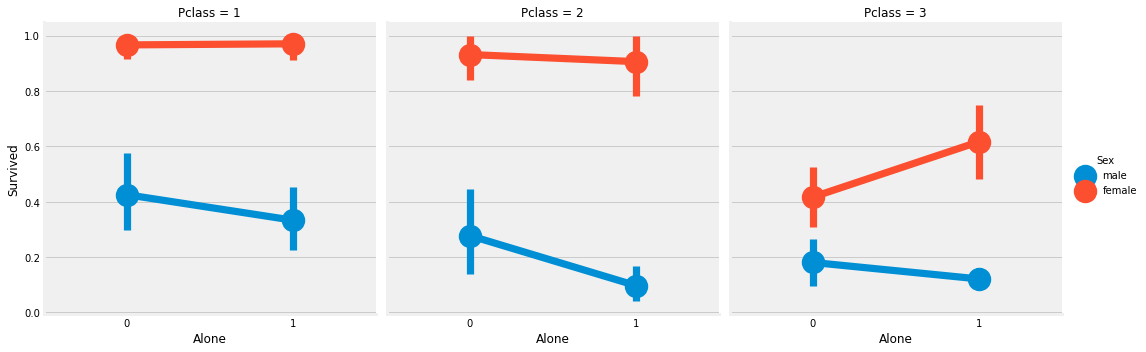

In [61]:
sns.factorplot('Alone', 'Survived', hue='Sex', data=df, col='Pclass')

In [62]:
# Fare_Range
# Fare 또한 연속형 변수이기 때문에 이산형 변수로 전한
# pd.qcut 사용. qcut는 설정한 bin에 따라 분리하고 정렬해준다.

In [63]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
df.groupby('Fare_Range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [64]:
# Fare이 노을수록 생존율도 높아진다.

In [65]:
df['Fare_cat'] = 0
df.loc[df.Fare <= 7.91, 'Fare_cat'] = 0
df.loc[(df.Fare > 7.91) & (df.Fare <= 14.454), 'Fare_cat'] = 1
df.loc[(df.Fare > 14.454) & (df.Fare <= 31.0), 'Fare_cat'] = 2
df.loc[(df.Fare > 31.0) & (df.Fare < 513), 'Fare_cat'] = 3

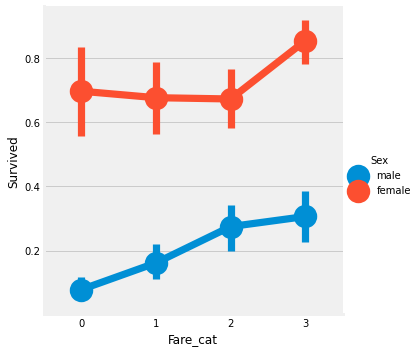

In [66]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex', data=df)

In [67]:
# Fare이 높을수록 생존율도 높아지는 것을확인

In [68]:
# 인코딩 작업
from sklearn.preprocessing import LabelEncoder

In [69]:
#le = LabelEncoder()
#le.fit(df.Sex)
#df['Sex'] = le.transform(df['Sex'])

In [70]:
#le.fit(df.Embarked)
#df.Embarked = le.transform(df.Embarked)

In [71]:
#le.fit(df.Initial)
#df.Initial = le.transform(df.Initial)

In [72]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [74]:
# drop UnNeeded Features
# Name : 딱 봐도 노필요
# Age : Age_band가 있다.
# Ticket : 딱봐도 노필요
# Fare : Fare_cat 있다
# Cabin : 객실번호가 왜 필요하겠나
# Fare_Range ; Fare_cat 있다.
# PassengerId : index가 있는데 왜 필요?

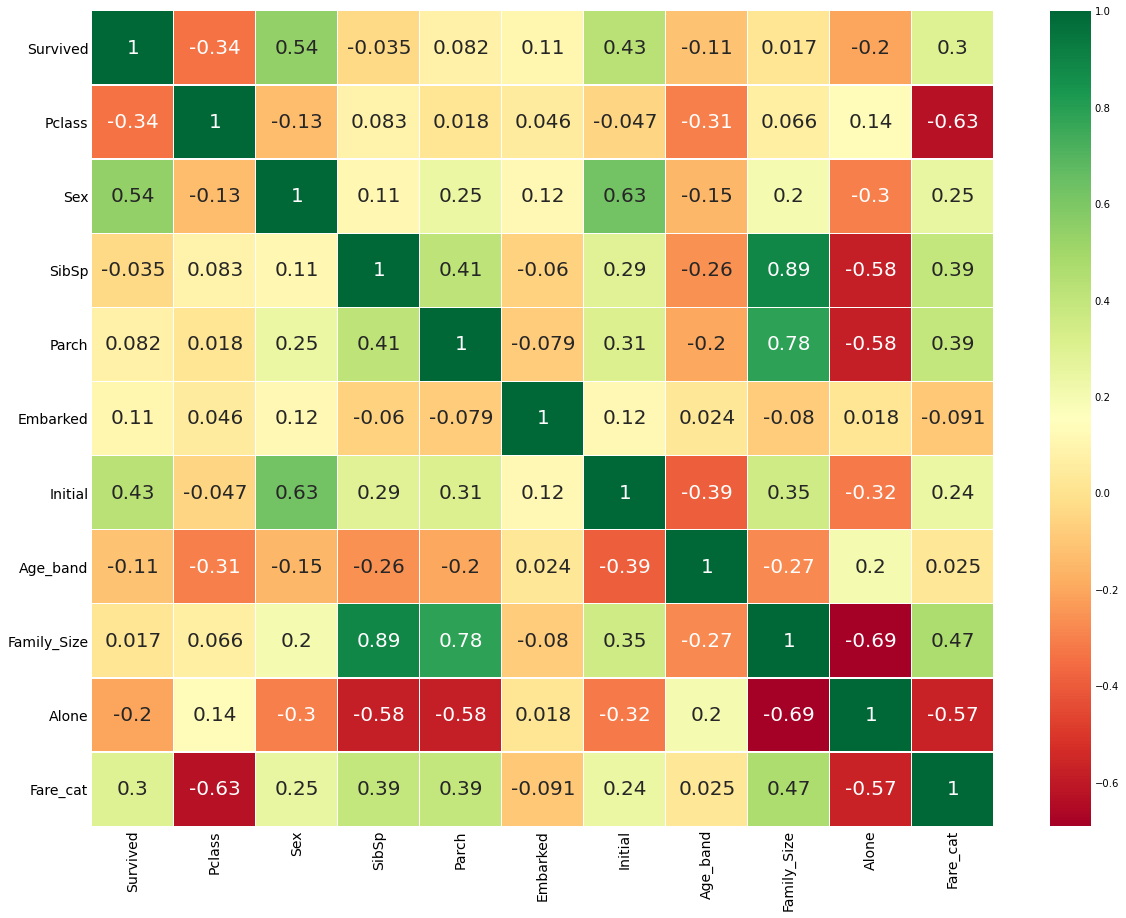

In [75]:
df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], inplace=True, axis=1)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})
#annot_kws : 글자 크기 조절 가능, fmt="f" : 데이터 표시 데이터타입
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [76]:
# SIbSp와 Family_Size, Parch와 Family_Size의 상관계수가 너무 높다.

In [77]:
# 예측하기
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [78]:
# stratify : Stratified K Fold 역할과 비슷. Stratify를 Target 변수로 지정해주면 비율에 맞게 나눠준다
train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df[df.columns[1:]]
Y=df['Survived']

In [79]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,0,3,0,0,0,0,0,1,0,1,0
836,0,3,0,0,0,0,0,1,0,1,1
639,0,3,0,1,0,0,0,2,1,0,2
389,1,2,1,0,0,1,2,1,0,1,1
597,0,3,0,0,0,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
131,0,3,0,0,0,0,0,1,0,1,0
490,0,3,0,1,0,0,0,2,1,0,2
838,1,3,0,0,0,0,0,1,0,1,3
48,0,3,0,2,0,1,0,2,2,0,2


In [80]:
# Radial Support Vector Machines

In [81]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [82]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
pred2 = model.predict(test_X)
print('Accuracy for linear SVC is ', metrics.accuracy_score(pred2, test_Y))

Accuracy for linear SVC is  0.8171641791044776


In [83]:
model = LogisticRegression()
model.fit(train_X, train_Y)
pred3 = model.predict(test_X)
print('Accuracy of the Logistic Regression is ', metrics.accuracy_score(pred3, test_Y))

Accuracy of the Logistic Regression is  0.8134328358208955


In [84]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
pred4 = model.predict(test_X)
print("Accuracy of the DecisionTreeClassifier is ", metrics.accuracy_score(pred4, test_Y))

Accuracy of the DecisionTreeClassifier is  0.8097014925373134


In [85]:
mdoel = KNeighborsClassifier()
model.fit(train_X, train_Y)
pred5 = model.predict(test_X)
print('Accuracy of the KNeighborClassifier is ', metrics.accuracy_score(pred5, test_Y))

Accuracy of the KNeighborClassifier is  0.8097014925373134


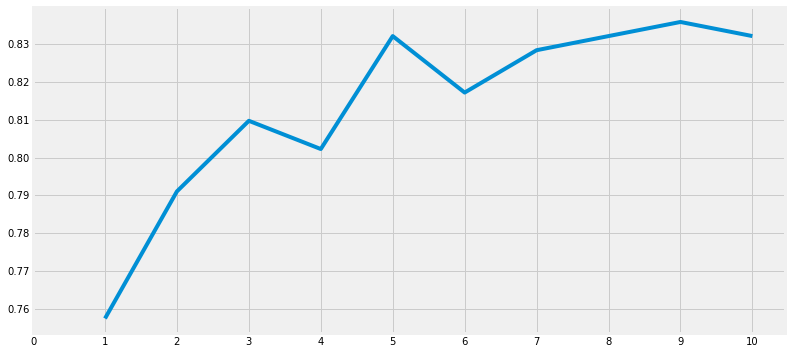

In [86]:
a_index = list(range(1, 11))
a = pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1, 11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    pred = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(pred, test_Y)))
    # Series의 append는 Series로 받는다.
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [87]:
print('Accuracies for different values of n are : ', a.values, 'with the max values as ' , a.values.max())

Accuracies for different values of n are :  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max values as  0.835820895522388


In [88]:
a

0    0.757463
0    0.791045
0    0.809701
0    0.802239
0    0.832090
0    0.817164
0    0.828358
0    0.832090
0    0.835821
0    0.832090
dtype: float64

In [89]:
model=GaussianNB()
model.fit(train_X, train_Y)
pred6 = model.predict(test_X)
print('Accuract of the NaiveBayes is ', metrics.accuracy_score(pred6, test_Y))

Accuract of the NaiveBayes is  0.8134328358208955


In [90]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
pred7 = model.predict(test_X)
print('Accuracy of the Random Forests is ', metrics.accuracy_score(pred7, test_Y))

Accuracy of the Random Forests is  0.8246268656716418


In [91]:
# 모델의 정확성이 분류의 성능을 꼭 결정하는 것은 아니다. 정확도가 90%가 넘는다고
# 다른 테스트 또는 학습용 데이터를 학습시켜서 90%의 정확성이 나온다고 보장은 할 수 없다.
# 정확도가 높아질 수도, 떨어질수도 있다. 이것을 model variance라고 한다.
# 이를 극복하기 위해 교차검증(Cross Validation)을 한다.

In [92]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [93]:
kfold = KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression','KNN','Decision Tree','Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),
         GaussianNB(),RandomForestClassifier(n_estimators=100)]

In [94]:
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.808115,0.025038
Naive Bayes,0.801386,0.028999
Random Forest,0.811486,0.034121


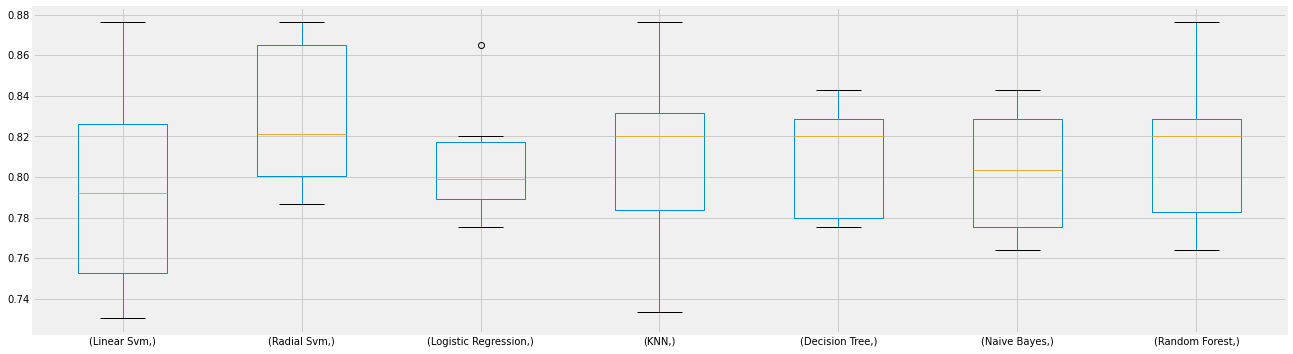

In [107]:
plt.subplots(figsize=(20, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot() # df.T는 transpose(col과 row를 서로 바꿔준다.)

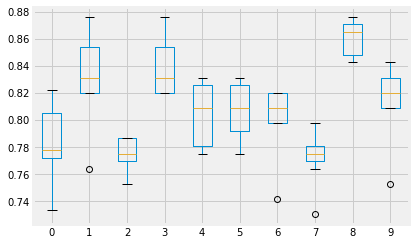

In [104]:
box.boxplot()

In [108]:
box

,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.811111,0.831461,0.752809,0.876404,0.775281,0.808989,0.741573,0.730337,0.853933,0.752809
Radial Svm,0.822222,0.876404,0.786517,0.876404,0.808989,0.820225,0.797753,0.786517,0.876404,0.831461
Logistic Regression,0.800000,0.820225,0.775281,0.820225,0.786517,0.786517,0.797753,0.797753,0.865169,0.808989
KNN,0.733333,0.876404,0.775281,0.831461,0.831461,0.831461,0.808989,0.775281,0.865169,0.808989
Decision Tree,0.777778,0.831461,0.786517,0.820225,0.820225,0.775281,0.820225,0.775281,0.842697,0.831461
Naive Bayes,0.766667,0.764045,0.786517,0.831461,0.775281,0.831461,0.820225,0.775281,0.842697,0.820225
Random Forest,0.777778,0.820225,0.764045,0.820225,0.831461,0.797753,0.820225,0.764045,0.876404,0.842697


In [106]:
box.T

,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Naive Bayes,Random Forest
0,0.811111,0.822222,0.800000,0.733333,0.777778,0.766667,0.777778
1,0.831461,0.876404,0.820225,0.876404,0.831461,0.764045,0.820225
2,0.752809,0.786517,0.775281,0.775281,0.786517,0.786517,0.764045
3,0.876404,0.876404,0.820225,0.831461,0.820225,0.831461,0.820225
4,0.775281,0.808989,0.786517,0.831461,0.820225,0.775281,0.831461
5,0.808989,0.820225,0.786517,0.831461,0.775281,0.831461,0.797753
6,0.741573,0.797753,0.797753,0.808989,0.820225,0.820225,0.820225
7,0.730337,0.786517,0.797753,0.775281,0.775281,0.775281,0.764045
8,0.853933,0.876404,0.865169,0.865169,0.842697,0.842697,0.876404
9,0.752809,0.831461,0.808989,0.808989,0.831461,0.820225,0.842697


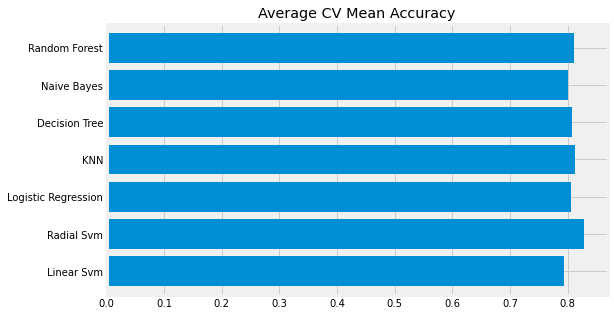

In [109]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

In [ ]:
# confusion Metrix : 성능 

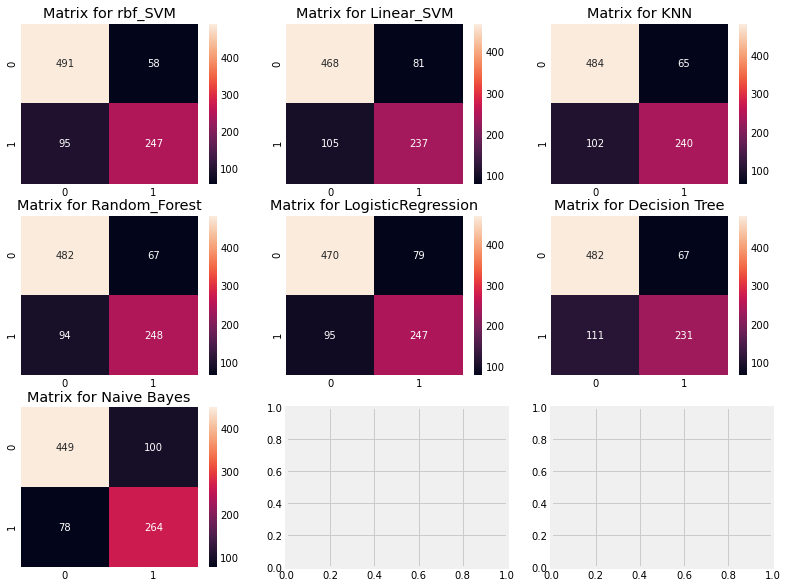

In [119]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf_SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear_SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title("Matrix for Random_Forest")
y_pred = cross_val_predict(LogisticRegression(), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for LogisticRegression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2) # subplots 사이에 예약된 공간
plt.show()

In [124]:
confusion_matrix(Y, y_pred)

array([[449, 100],
       [ 78, 264]], dtype=int64)

In [125]:
# rbf_SVM에서 옳은 예측은 491 + 247 -> accuracy = (491+247)/891
# error은 58 + 95, 문제는 생존자를 사망자로 예측한게 더 많다.
# rbf_SVM은 사망자를 정확하게 예측할 확률이 높고, 네이비안은 생존자를 정확하게 예측할 확률이 있다.

In [126]:
# Hyper Parameters 튜닝
# 머신러닝에서 사용자가 직접 튜닝함으로서 모델의 성능을 조절할 수 있다.

In [131]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
# verbose : iteration시마다 수행결과 메시지 출력 여부
# 0 : 메시지 출력 ㄴ(default)
# 1 : 간단한 메세지 출력
# 2 : 하이퍼 파라미터별 메시지 출력
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   16.7s finished


In [132]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   30.1s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [133]:
# Ensambling

In [134]:
# voting Classifier : 여러 다른 ML 모델의 예측을 결합한 가장 간단한 방법.
# 이는 모든 submodels로부터 예측의 결과물을 평균낸다.

In [137]:
from sklearn.ensemble import VotingClassifier

In [140]:
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                             ('RBF', svm.SVC(probability=True, kernel='rbf',C=0.5, gamma=0.1)),
                                             ('RFor',RandomForestClassifier(n_estimators=500, random_state=0)),
                                             ('LR', LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                             ('NB',GaussianNB()),
                                             ('svm',svm.SVC(kernel='linear', probability=True))],
                                  voting='soft').fit(train_X,train_Y)
print('Accuracy for ensembled model is : ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is' , cross.mean())

Accuracy for ensembled model is :  0.8208955223880597
The cross validated score is 0.8249188514357053


In [141]:
# Bagging : 분산이 높은 모델에서 잘 작동한다.

In [144]:
# Bagging KNN
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
pred = model.predict(test_X)
print('Accuracy for bagged KNN is ', metrics.accuracy_score(pred, test_Y))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is ', result.mean())

Accuracy for bagged KNN is  0.835820895522388
The cross validated score for bagged KNN is  0.8160424469413232


In [146]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
pred = model.predict(test_X)
print('Accuracy for bagged Decision Tree is ', metrics.accuracy_score(pred, test_Y))
result = cross_val_score(model, X,Y,cv=10, scoring='accuracy')
print('The Cross validated score for bagged Decision Tree is ', result.mean())

Accuracy for bagged Decision Tree is  0.8208955223880597
The Cross validated score for bagged Decision Tree is  0.8171410736579275


In [147]:
# Boosting

In [149]:
# Adaboost (Decision Tree)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score for Adaboost is ', result.mean())

The Cross validated score for Adaboost is  0.8249188514357055


In [152]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score is ', result.mean())

The Cross validated score is  0.8115230961298376


In [153]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score is ', result.mean())

The Cross validated score is  0.8160299625468165


In [154]:
# Adaboost의 성능이 가장 좋다.
# Hyper_Parameter을 튜닝해보자

In [167]:
n_estimators = list(range(100, 1100, 100))
learn_rate = list(np.arange(0.05, 1, 0.05))
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 190 candidates, totalling 950 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed: 11.6min finished


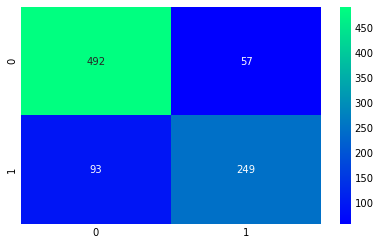

In [168]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
result=cross_val_predict(ada,X,Y,cv=100)
sns.heatmap(confusion_matrix(Y,result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

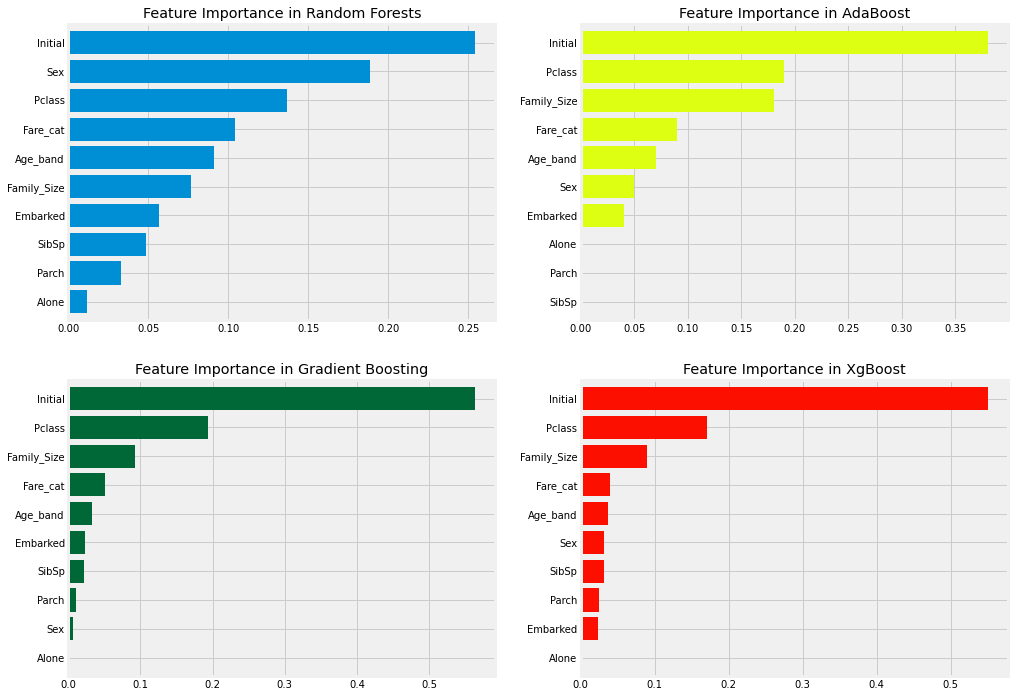

In [173]:
f,ax = plt.subplots(2, 2, figsize=(15, 12))
model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()